In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from google.colab import files
uploaded = files.upload()

Saving reviews_all.csv to reviews_all (1).csv


# Intro

In the following project, we will create a wordcloud and will do a text analysis to see if the comments match with the score or if we are observing a different trend.

In [29]:
file='reviews_all.csv'
df=pd.read_csv(file)
df.head()

,Unnamed: 0,prod,title,date,ver.purchase,format,stars,comments,attitude
0,1,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n I think I got fake...,15-Aug-19,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,"My first purchase they wore out in 1-2 washes,...",complaint
1,2,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Inconsistent quali...,24-Jun-18,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,Bought these for walking/jogging. Bu...,complaint
2,3,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n not UA socks\n \n,9-Nov-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,I have purchased 6 sets of these soc...,complaint
3,4,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",\n\n\n\n\n\n\n\n \n \n Socks slide down -...,24-Jul-19,1,Number of Items: 6Petrol Blue AssortedSize: Me...,1,These socks are comfy but they do no...,complaint
4,5,"Under Armour Adult Resistor 3.0 Low Cut Socks,...","\n\n\n\n\n\n\n\n \n \n Horrible quality, ...",20-May-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,"Extremely poor quality, coming apart...",complaint


# Data Cleaning

In [30]:
df=df.rename(columns={'Unnamed: 0':'numb'})
df['title']=df.title.str.strip(' \n ')
df.head()

,numb,prod,title,date,ver.purchase,format,stars,comments,attitude
0,1,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",I think I got fake UA socks from AMAZON!,15-Aug-19,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,"My first purchase they wore out in 1-2 washes,...",complaint
1,2,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Inconsistent quality,24-Jun-18,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,Bought these for walking/jogging. Bu...,complaint
2,3,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",not UA socks,9-Nov-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,I have purchased 6 sets of these soc...,complaint
3,4,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Socks slide down - disappointing,24-Jul-19,1,Number of Items: 6Petrol Blue AssortedSize: Me...,1,These socks are comfy but they do no...,complaint
4,5,"Under Armour Adult Resistor 3.0 Low Cut Socks,...","Horrible quality, doubt these can be genuine U...",20-May-18,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,"Extremely poor quality, coming apart...",complaint


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   numb          1000 non-null   int64 
 1   prod          1000 non-null   object
 2   title         1000 non-null   object
 3   date          1000 non-null   object
 4   ver.purchase  1000 non-null   int64 
 5   format        992 non-null    object
 6   stars         1000 non-null   int64 
 7   comments      1000 non-null   object
 8   attitude      150 non-null    object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [32]:
df.isnull().sum()/len(df.isnull())*100

numb             0.0
prod             0.0
title            0.0
date             0.0
ver.purchase     0.0
format           0.8
stars            0.0
comments         0.0
attitude        85.0
dtype: float64

Here we can see that the data types make sense, but we are dealing with null values in the columns 'format' and 'attitude'. We will fix attitude with the lambda function. Since 85% of the data is missing in the "stars" column, we will use the lambda function to complete the "stars" columns. We will also create a new column, "attitude", with our interpretation, by using lambda.

1-2=> complaint

3=> neutral

4-5 => compliment

In [33]:
df['date']=pd.to_datetime(df.date)
df.head()

,numb,prod,title,date,ver.purchase,format,stars,comments,attitude
0,1,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",I think I got fake UA socks from AMAZON!,2019-08-15,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,"My first purchase they wore out in 1-2 washes,...",complaint
1,2,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Inconsistent quality,2018-06-24,1,Number of Items: 6Black/Graphite (6-pairs)Size...,1,Bought these for walking/jogging. Bu...,complaint
2,3,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",not UA socks,2018-11-09,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,I have purchased 6 sets of these soc...,complaint
3,4,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Socks slide down - disappointing,2019-07-24,1,Number of Items: 6Petrol Blue AssortedSize: Me...,1,These socks are comfy but they do no...,complaint
4,5,"Under Armour Adult Resistor 3.0 Low Cut Socks,...","Horrible quality, doubt these can be genuine U...",2018-05-20,1,Number of Items: 6White/Graphite (6-pairs)Size...,1,"Extremely poor quality, coming apart...",complaint


In [34]:
df['attitude']=df.stars.apply(lambda x: 'complaint' if 1>= x <=2 else 'neutral' if x==3 else 'compliment')
df['format']=df.format.str.strip('Number of Items:')
df.head()

,numb,prod,title,date,ver.purchase,format,stars,comments,attitude
0,1,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",I think I got fake UA socks from AMAZON!,2019-08-15,1,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint
1,2,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Inconsistent quality,2018-06-24,1,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint
2,3,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",not UA socks,2018-11-09,1,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint
3,4,"Under Armour Adult Resistor 3.0 Low Cut Socks,...",Socks slide down - disappointing,2019-07-24,1,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint
4,5,"Under Armour Adult Resistor 3.0 Low Cut Socks,...","Horrible quality, doubt these can be genuine U...",2018-05-20,1,6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   numb          1000 non-null   int64         
 1   prod          1000 non-null   object        
 2   title         1000 non-null   object        
 3   date          1000 non-null   datetime64[ns]
 4   ver.purchase  1000 non-null   int64         
 5   format        992 non-null    object        
 6   stars         1000 non-null   int64         
 7   comments      1000 non-null   object        
 8   attitude      1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB


# Exploratory Analysis

In [36]:
df['prod'].value_counts()

Under Armour Adult Resistor 3.0 Low Cut Socks, Multipairs    1000
Name: prod, dtype: int64

In [37]:
#Breakdown by month
date=df.set_index('date')
date.groupby([pd.Grouper(freq='M'), 'date'])['prod'].count()

date        date      
2016-05-31  2016-05-24    1
2016-07-31  2016-07-26    1
2016-08-31  2016-08-04    1
            2016-08-10    1
            2016-08-13    1
                         ..
2022-03-31  2022-03-06    2
            2022-03-10    1
            2022-03-11    1
            2022-03-19    1
            2022-03-20    1
Name: prod, Length: 763, dtype: int64

In [38]:
#Breakdown by year
date=df.set_index('date')
date.groupby([pd.Grouper(freq='y'), 'date'])['prod'].count()

date        date      
2016-12-31  2016-05-24    1
            2016-07-26    1
            2016-08-04    1
            2016-08-10    1
            2016-08-13    1
                         ..
2022-12-31  2022-03-06    2
            2022-03-10    1
            2022-03-11    1
            2022-03-19    1
            2022-03-20    1
Name: prod, Length: 763, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

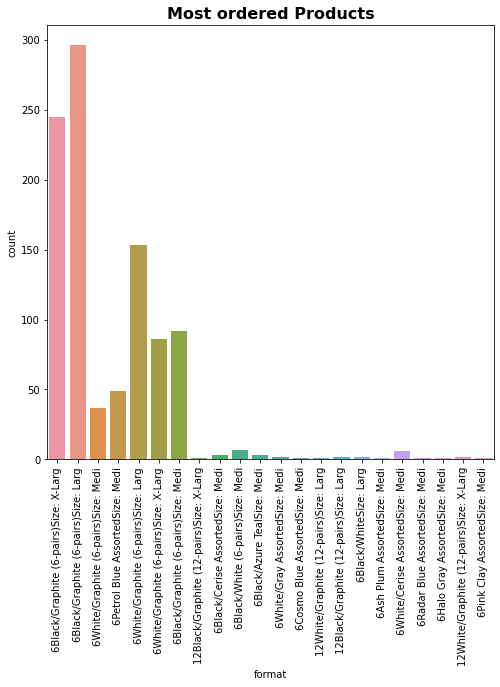

In [39]:
#Most ordered Products
plt.figure(figsize=(8,8))
sns.countplot(df.format)
plt.title('Most ordered Products', size=16, fontweight='bold')
plt.xticks(rotation=90)

compliment    784
complaint     159
neutral        57
Name: attitude, dtype: int64


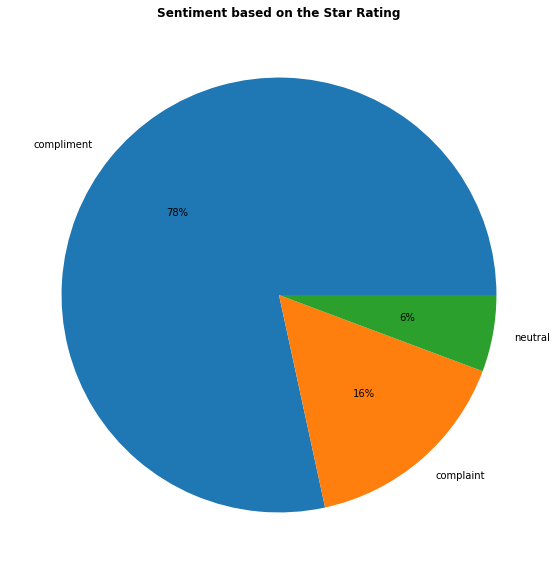

In [40]:
#Pie chart of sentiment based on the star rating
plt.figure(figsize=(10,10))
df.attitude.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Sentiment based on the Star Rating', size=12, fontweight='bold')
print(df.attitude.value_counts())

Next, we just select the columns that we need for the wordcloud and text anaylsis.

In [41]:
df.columns

Index(['numb', 'prod', 'title', 'date', 'ver.purchase', 'format', 'stars',
       'comments', 'attitude'],
      dtype='object')

In [42]:
df=df[['title', 'format', 'stars', 'comments', 'attitude']]
df.head()

,title,format,stars,comments,attitude
0,I think I got fake UA socks from AMAZON!,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint
1,Inconsistent quality,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint
2,not UA socks,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint
3,Socks slide down - disappointing,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint
4,"Horrible quality, doubt these can be genuine U...",6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint


# Analysis
## WordCloud for Title

In [43]:
!pip install clean_text
from cleantext import clean
text=' '.join(review for review in df.title)
text=clean(text, no_emoji=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 399.5, 199.5, -0.5)

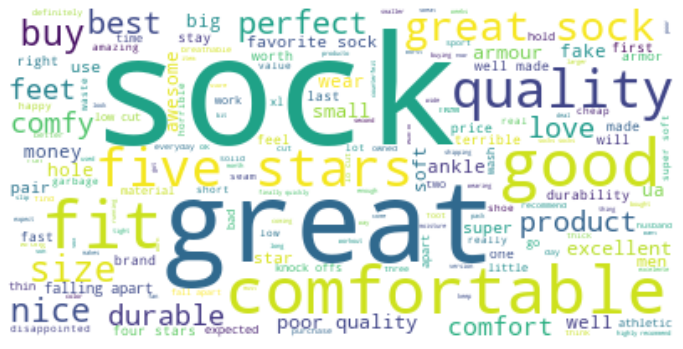

In [44]:
stopwords=set(STOPWORDS)
stopwords.update(['socks', 'Socks'])
wordcloud=WordCloud(background_color='white').generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

When we analyze the wordcloud of comment titles, we can observe the same relatively positive feedback that we were able to observe from the existing attitude column.

In [45]:
textc=' '.join(review for review in df.comments)

(-0.5, 399.5, 199.5, -0.5)

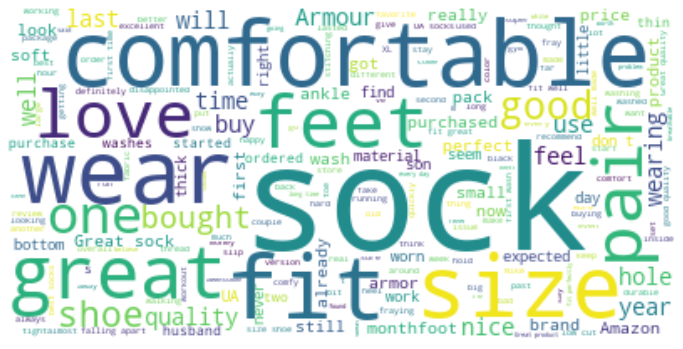

In [46]:
stopwords.update(['Under', 'Armour', 'Armour ', ' Armour', 'armor', 'now', 'socks', 'Socks', 'brand', ' Armour ', 'bought', 'pruchased',
                  'pruchase', 'sock', 'Sock', ' sock ', ' Sock '])
wordcloud=WordCloud(background_color='white').generate(textc)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Here it is a little bit more difficult to get a clear picture what the emotions are behind the comments. Therefore a sentiment analysis is requiered.

## Sentiment Analysis

In [47]:
#Vader text analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent=SentimentIntensityAnalyzer()
test=df.comments
polarity=[round(sent.polarity_scores(x) ['compound'], 2) for x in test]
df['sentiment_score']=polarity
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,format,stars,comments,attitude,sentiment_score
0,I think I got fake UA socks from AMAZON!,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint,-0.89
1,Inconsistent quality,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint,0.77
2,not UA socks,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint,0.68
3,Socks slide down - disappointing,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint,-0.52
4,"Horrible quality, doubt these can be genuine U...",6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint,-0.93


In [48]:
df['intention']=df.sentiment_score.apply(lambda x: 'complaint' if x < 0 else 'neutral' if x==0 else 'compliment')
df.head()

,title,format,stars,comments,attitude,sentiment_score,intention
0,I think I got fake UA socks from AMAZON!,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint,-0.89,complaint
1,Inconsistent quality,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint,0.77,compliment
2,not UA socks,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint,0.68,compliment
3,Socks slide down - disappointing,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint,-0.52,complaint
4,"Horrible quality, doubt these can be genuine U...",6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint,-0.93,complaint


Text(0.5, 1.0, 'Outcome of the Vader Sentiment Analysis')

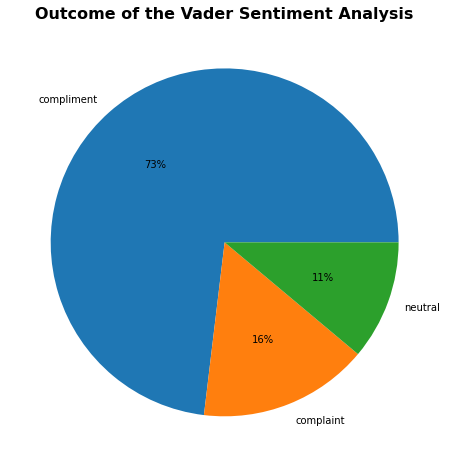

In [49]:
#Outcome of the Vader sentiment analysis
plt.figure(figsize=(8,8))
df.intention.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Outcome of the Vader Sentiment Analysis', size=16, fontweight='bold')

In [50]:
df.intention.value_counts()

compliment    731
complaint     158
neutral       111
Name: intention, dtype: int64

The Vader analysis comes to a familiar outcome but considers comments more neutral as positive or negative. We check a few comments and their Vader sentiment interpretation to get a better idea of how accurate/good the Vader model is.

## Checking if the positive interpretation of the Vader model makes sense for the 1-2 star rating

In [51]:
#postive but 1 stars
print(df[(df.intention=='compliment') & (df.stars==1)].iloc[0,3])
print(df[(df.intention=='compliment') & (df.stars==1)].iloc[22,3])
print(df[(df.intention=='compliment') & (df.stars==1)].iloc[23,3])

          Bought these for walking/jogging. But the fabric feels thinner, un-padded  and cheaper than those I previously purchased.  They ripped easily on first use as in the attached  photo. Definitely switching to another more consistent brand.  
          Right away I noticed that they were frayed and after just 2 washes one pair got a hole in it. After that they all seemed to start falling apart. Out of the original order I am down to just 3 pair. Will not order again especially since the price was higher than what I usually spend.  
          Can't tell the truth against amazon so here we go.Wonderful product from a Wonderful seller. We should all be on our knees thanking amazon  


In [52]:
#postive but 2 stars
print(df[(df.intention=='compliment') & (df.stars==2)].iloc[0,3])
print(df[(df.intention=='compliment') & (df.stars==2)].iloc[22,3])
print(df[(df.intention=='compliment') & (df.stars==2)].iloc[23,3])

          I saw a review that stated the versions without the size printed on the bottom are fake. I am thinking the same. I bought a 12 pack (which is really 2 packs of 6 pairs) of the same socks and they feel super soft and feel pretty good quality. I will need to wear them for much longer to see if they are durable. They have the size printed on the bottom. I bought another 6 pack from a different seller fulfilled by Amazon, and the socks did not have the size. They also felt way less soft. There are subtle differences in the print on the socks as well. I think they are either fake or just a new or old version that is less quality than the first ones I got so I returned them.The reason I think they are fake is because Under Armour online (where I shop directly from all the time) has the socks with the size printed on the bottom. I will purchase from them.  
          I love these sock. They fit and feel great, but after a couple washes they started fraying. Now I don't think they'll

These rating seem primarly negative and not positive.

## Checking if the neutral interpretation of the Vader model makes sense for the 3 star rating

In [53]:
#postive but 3 stars
print(df[(df.intention=='neutral') & (df.stars==3)].iloc[0,3])
print(df[(df.intention=='neutral') & (df.stars==3)].iloc[5,3])
print(df[(df.intention=='neutral') & (df.stars==3)].iloc[6,3])

          These are not the same as you buy in stores.  They seem a little smaller, thinner, and not finished as nice....they are rough on the inside, shrink up quick.Won't buy again.  
          I thought this would spin and it doesn't. Returning it.  
          Smaller then usual  


These statments do not seem neutral, they make a negative impression. Let's check what it looks like for the 4-5 star ratings which Vader considers as negative. 

## Checking if the neagtive interpretation of the Vader model makes sense for the 4-5 star rating

We did not find any neagtive values with 4-5 star ratings, which gives us the impression that Vader tends to be more postive than negative in their analysis.

Next, we will try Flair as a different model, to see if we will get a different outcome.

In [54]:
#Setting up the Flair model
#!pip install flair #if you have not installed it yet
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
  sentence = Sentence(x)
  sia.predict(sentence)
  score = sentence.labels[0]
  if "POSITIVE" in str(score):
    return "pos"
  elif "NEGATIVE" in str(score):
    return "neg"
  else:
    return "neu"

df['new_sentiment']=df.comments.apply(flair_prediction)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 981 kB 58.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.4 MB/s 
     |████████████████████████████████| 182 kB 46.5 MB/s 
     |████████████████████████████████| 19.7 MB 63.4 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 788 kB 62.4 MB/s 
     |████████████████████████████████| 5.8 MB 24.3 MB/s 
     |████████████████████████████████| 200 kB 58.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 7.6 MB 38.5 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=e7419abb5543d8d97da7ab24629455cebeb39caef7841d161a4f196c4078c9cf
  Stored in directory: /root/.cache/pip/wheels/3d/9f/9d/d806a20bd97bc7076d724fa3e69fa5be61836ba16b2ffa6126
  Created w

100%|██████████| 265512723/265512723 [00:12<00:00, 21575815.24B/s]

2022-12-11 13:51:13,856 copying /tmp/tmp5lc5w9ro to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-12-11 13:51:14,563 removing temp file /tmp/tmp5lc5w9ro
2022-12-11 13:51:14,619 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [55]:
df.head()

,title,format,stars,comments,attitude,sentiment_score,intention,new_sentiment
0,I think I got fake UA socks from AMAZON!,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint,-0.89,complaint,neg
1,Inconsistent quality,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint,0.77,compliment,neg
2,not UA socks,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint,0.68,compliment,neg
3,Socks slide down - disappointing,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint,-0.52,complaint,neg
4,"Horrible quality, doubt these can be genuine U...",6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint,-0.93,complaint,neg


In [56]:
df=df[['title', 'format', 'stars', 'comments', 'attitude', 'intention', 'new_sentiment']]
df.head()

,title,format,stars,comments,attitude,intention,new_sentiment
0,I think I got fake UA socks from AMAZON!,6Black/Graphite (6-pairs)Size: X-Larg,1,"My first purchase they wore out in 1-2 washes,...",complaint,complaint,neg
1,Inconsistent quality,6Black/Graphite (6-pairs)Size: Larg,1,Bought these for walking/jogging. Bu...,complaint,compliment,neg
2,not UA socks,6White/Graphite (6-pairs)Size: Medi,1,I have purchased 6 sets of these soc...,complaint,compliment,neg
3,Socks slide down - disappointing,6Petrol Blue AssortedSize: Medi,1,These socks are comfy but they do no...,complaint,complaint,neg
4,"Horrible quality, doubt these can be genuine U...",6White/Graphite (6-pairs)Size: Larg,1,"Extremely poor quality, coming apart...",complaint,complaint,neg


compliment    784
complaint     159
neutral        57
Name: attitude, dtype: int64


Text(0.5, 1.0, 'Sentiment based on the star rating')

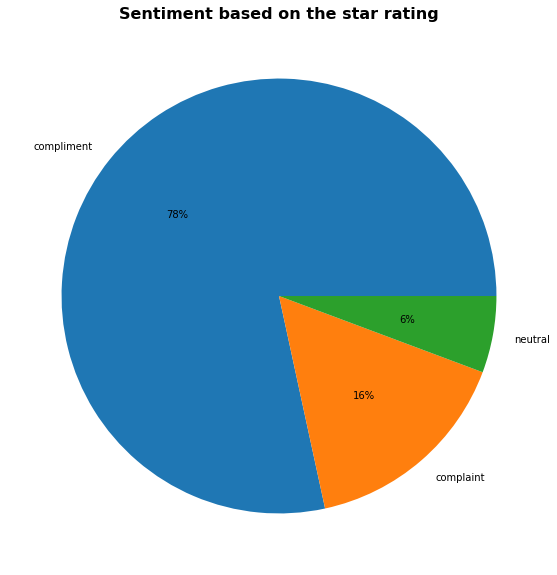

In [57]:
#Sentiment based on the star rating
print(df.attitude.value_counts())
plt.figure(figsize=(10,10))
df.attitude.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Sentiment based on the star rating', size=16, fontweight='bold')

pos    664
neg    336
Name: new_sentiment, dtype: int64


Text(0.5, 1.0, 'Outcome of the Flair Sentiment Analysis')

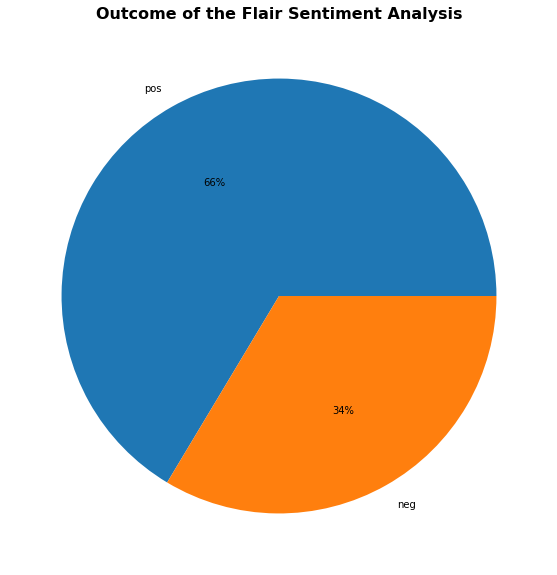

In [58]:
#Outcome of the Flair sentiment analysis
print(df.new_sentiment.value_counts())
plt.figure(figsize=(10,10))
df.new_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Outcome of the Flair Sentiment Analysis', size=16, fontweight='bold')

The first impression is that the Flair model tends to be more negative than the orignal star rating based sentiment. We can also see that the Flair model hardly gives away the neutral status. Before deciding which model is better suited for the analysis, we check how accurate the Flair model is.

## Checking if the positive interpretation of the Flair model makes sense for the 1-3 star rating

In [59]:
#postive but 1 stars
print(df[(df.new_sentiment=='pos') & (df.stars==1)].iloc[0,3])
print(df[(df.new_sentiment=='pos') & (df.stars==1)].iloc[1,3])

          Can't tell the truth against amazon so here we go.Wonderful product from a Wonderful seller. We should all be on our knees thanking amazon  
          I bought these as a gift! They came in the mail today and their dirty and have been worn!  


In [60]:
#postive but 2 stars
print(df[(df.new_sentiment=='pos') & (df.stars==2)].iloc[0,3])
print(df[(df.new_sentiment=='pos') & (df.stars==2)].iloc[1,3])

          These started out great, but each sock has a point of weakness near the ankle (where the gray "spikes" up a bit). This is where the sock will easily tear. The long version of these socks are great. I purchased 2 packs separately; in one pack, the socks were thinner than the socks in the other pack. (The long versions are thicker than the thickest of the Lo Cut versions). If they could get the quality of manufacture up and consistent, and solve the design flaw, this could be a great, comfortable sock.  
          they were childrens socks  


In [61]:
#negative but 3 stars
print(df[(df.new_sentiment=='pos') & (df.stars==3)].iloc[1,3])
print(df[(df.new_sentiment=='pos') & (df.stars==3)].iloc[2,3])
print(df[(df.new_sentiment=='pos') & (df.stars==3)].iloc[3,3])

          Love under armour gear and this style of socks.  I have a bunch of the same socks.  Makes it easier to match up the socks after doing laundry.  However, I just feel like these socks don't last more then 6 months at a time.  Love the feel though.  (48yr old man who still loves to ball out with the guys!)  Rick  
          Great socks, the only problem was one of the socks had a hole in it on the top portion of it. Very visible when wearing.  
          The price was good  


When it comes to to the "positive" statments, Flair considers neagtive statments as positive ones.

## Checking if the flair negative interpretation makes sense for the 3-5 star rating

In [62]:
#negative but 5 stars
print(df[(df.new_sentiment=='neg') & (df.stars==5)].iloc[16,3])
print(df[(df.new_sentiment=='neg') & (df.stars==5)].iloc[17,3])
print(df[(df.new_sentiment=='neg') & (df.stars==5)].iloc[18,3])

          The only thing is the quality is not as it always should be.  
          Is not 100% dry fit, but you wont have any issues at the gym or jogging  
          Won’t buy another sock again perfect for size 14  


In [63]:
#negative but 4 stars
print(df[(df.new_sentiment=='neg') & (df.stars==4)].iloc[21,3])
print(df[(df.new_sentiment=='neg') & (df.stars==4)].iloc[22,3])
print(df[(df.new_sentiment=='neg') & (df.stars==4)].iloc[23,3])

          Too big (shoe size 6-7), very thin  
          These are comfy, but they are small in size so order up a size.  
          Could have been a tad bit thicker, but otherwise quality sock.  


In [64]:
#negative but 3 stars
print(df[(df.new_sentiment=='neg') & (df.stars==3)].iloc[21,3])
print(df[(df.new_sentiment=='neg') & (df.stars==3)].iloc[22,3])
print(df[(df.new_sentiment=='neg') & (df.stars==3)].iloc[23,3])

          Sock is comfortable, but they rip easy. Have already trashed 2 pair. Had hold in them. Not worth the price your paying for name only on this. Sorry UA but this one is a no go. You get 3 stars only because they are comfortable and you sell them in a size large enough for me. 15 US size.  
          Look and feel great but not very durable. The button of the feet start to get worn fast.  
          Very tight on size 13, yet claims to fit up to size 15  


But what we can see here is very important. We see here comments with 4-5 star ratings. These comments would be considered positive, but the Flair model considers them negative. When we read them, we can understand why. Even though these comments have 4-5 stars, the content of the comments is, to some extent, negative. The users who wrote these comments mentioned something positive but continued saying something negative. That the Flair model detacted that is very important and allows us to get a better insight of what customers think about the product and allows us (as a producer) or the merchants (when we are providing the shopping platform) to improve the quality of the product.

But why is it so important? We found users who did give a 4-5 star rating, but their comments were negative. Usually, we would not check a 4-5 star rating for any criticism. But criticism is essential to improve the product. Without the Flair model, we would have missed that.

# Comparing the Vader and Flair Model

Text(0.5, 1.0, 'Outcome of Vader Sentiment Analysis')

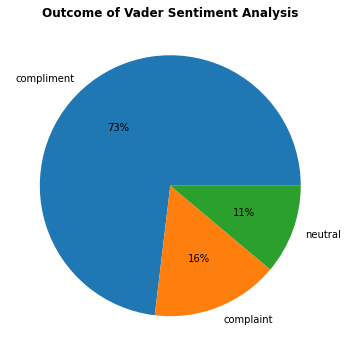

In [65]:
plt.figure(figsize=(6,6))
df.intention.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Outcome of Vader Sentiment Analysis', size=12, fontweight='bold')

Text(0.5, 1.0, 'Outcome of Flair Sentiment Analysis')

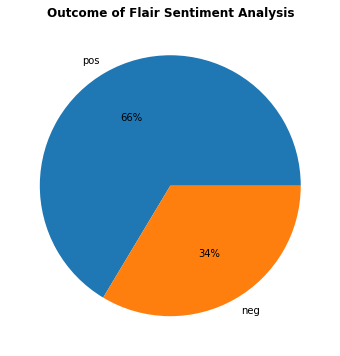

In [66]:
plt.figure(figsize=(6,6))
df.new_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Outcome of Flair Sentiment Analysis', size=12, fontweight='bold')

We can see that the Flair model is not as positive as the Vader model.

By randomly picking further comments based on their allocated sentiment value, we could see that Flair's model interpretation seemed more accurate. Based on that, I would conclude that the Flair model is the more suitable analysis tool in this case.

# Conclusion

For this project, the Flair model was more suitable than the Vader model. The Flair model's output allows us to understand the customer's opinion better. Many customers did criticise the product even when they gave it a 4- or 5-star rating. Using this model allows us to look past the star rating and focus on what customers think about the product(s).

We have to mention that the Vader and Flair libraries are basic text analysis tools which range from an accuracy of 60%-75%. We will only obtain a better result with trained machine learning models (80%-90% accuracy).